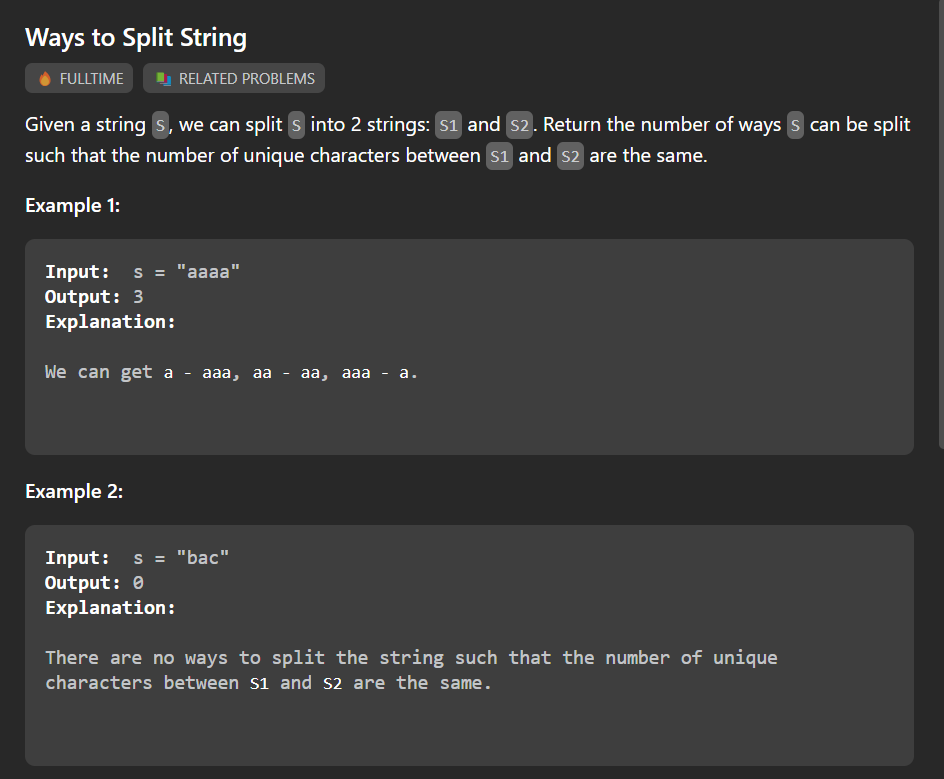

```cpp

```cpp
#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long




void solve(){

	string s;
	cin>>s;

	vector<int>charCount(26);
	int uniqueChars=0;

	for(auto ch:s){
		if(charCount[ch-'a']==0){
			uniqueChars++;
		}
		charCount[ch-'a']++;

	}


	vector<int>visited(26);
	int ans=0;


	int uniqueCharsvisted=0;


	for(auto ch:s){
		if(visited[ch-'a']==0){
			uniqueCharsvisted++;
		}
		visited[ch-'a']++;
		charCount[ch-'a']--;


		if(charCount[ch-'a']==0){
			uniqueChars--;
		}
		if(uniqueChars==uniqueCharsvisted){
			ans++;
		}

	}
	cout<<ans<<endl;


    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);	
    // int _t;cin>>_t;while(_t--)
    solve();
}

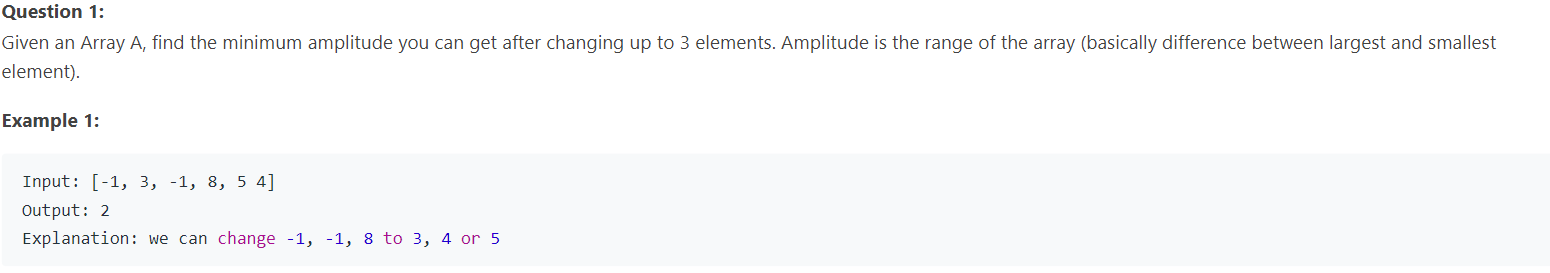

```cpp
#include <iostream>
#include <vector>
#include <queue>
#include <algorithm>
#include <climits>

using namespace std;

int minAmplitude2(vector<int>& nums) {
    if (nums.size() <= 4) return 0;
    
    priority_queue<int> maxQueue; // Default max heap
    priority_queue<int, vector<int>, greater<int>> minQueue; // Min heap

    for (int n : nums) {
        maxQueue.push(n);
        if (maxQueue.size() > 4) maxQueue.pop();
        
        minQueue.push(n);
        if (minQueue.size() > 4) minQueue.pop();
    }

    vector<int> maxList, minList;
    while (!maxQueue.empty()) {
        maxList.push_back(maxQueue.top());
        maxQueue.pop();
    }
    
    while (!minQueue.empty()) {
        minList.push_back(minQueue.top());
        minQueue.pop();
    }

    int ans = INT_MAX;
    for (int i = 0; i <= 3; i++) {
        ans = min(ans, maxList[i] - minList[3 - i]);
    }
    
    return ans;
}

int main() {
    vector<int> nums = {1, 3, 6, 9, 7, 5, 10, 15}; // Example input
    cout << minAmplitude2(nums) << endl;
    return 0;
}


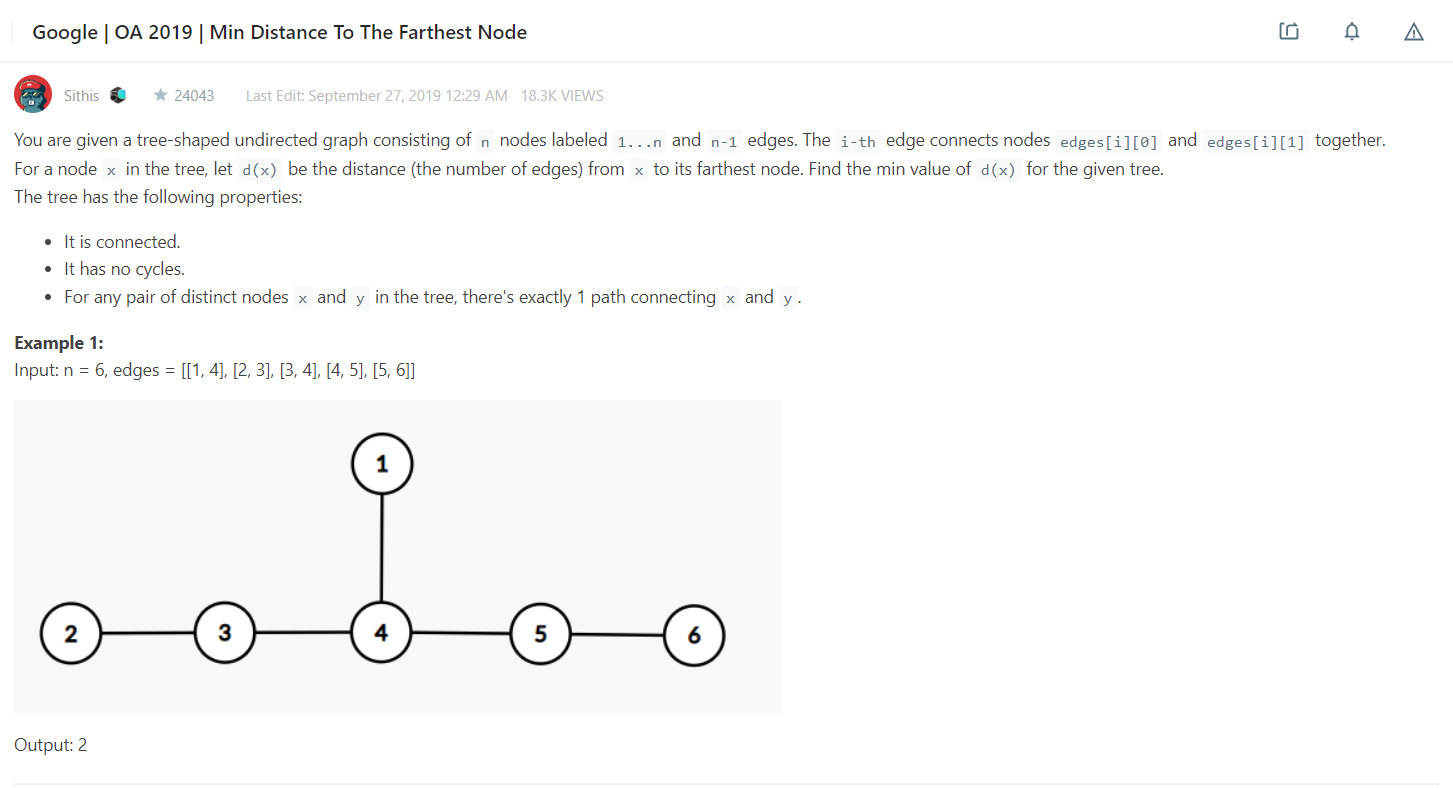

```cpp

#include <bits/stdc++.h>
using namespace std;
#define endl '\n'
#define int long long


vector<vector<int>>graph;
vector<int>depth;


void dfs(int node,int parent,int d){
  depth[node]=d;
  for(auto it:graph[node]){
    if(it!=parent){
      dfs(it,node,d+1);
    }
  }
}



void solve(){

  int n;
  cin>>n;
  graph.assign(n+1,vector<int>());
  depth.assign(n+1,0);



  for(int i=1;i<n;i++){
    int u,v;
    cin>>u>>v;
    graph[u].push_back(v);
    graph[v].push_back(u);
  }

  dfs(1,0,0);

  int maxCh=1;
  for(int i=1;i<=n;i++){
    if(depth[i]>depth[maxCh]){
      maxCh=i;
    }
  }

  dfs(maxCh,0,0);
  for(int i=1;i<=n;i++){
    if(depth[i]>depth[maxCh]){
      maxCh=i;
    }
  }

  cout<<depth[maxCh]<<endl;



    

    

}

signed main(){
    ios_base::sync_with_stdio(false);
    cin.tie(NULL);cout.tie(NULL);  
    // int _t;cin>>_t;while(_t--)
    solve();
}



the answer is ( diameter / 2 ) if the diameter value is even
answer = ( diameter / 2 ) + 1 if the diameter value is odd.

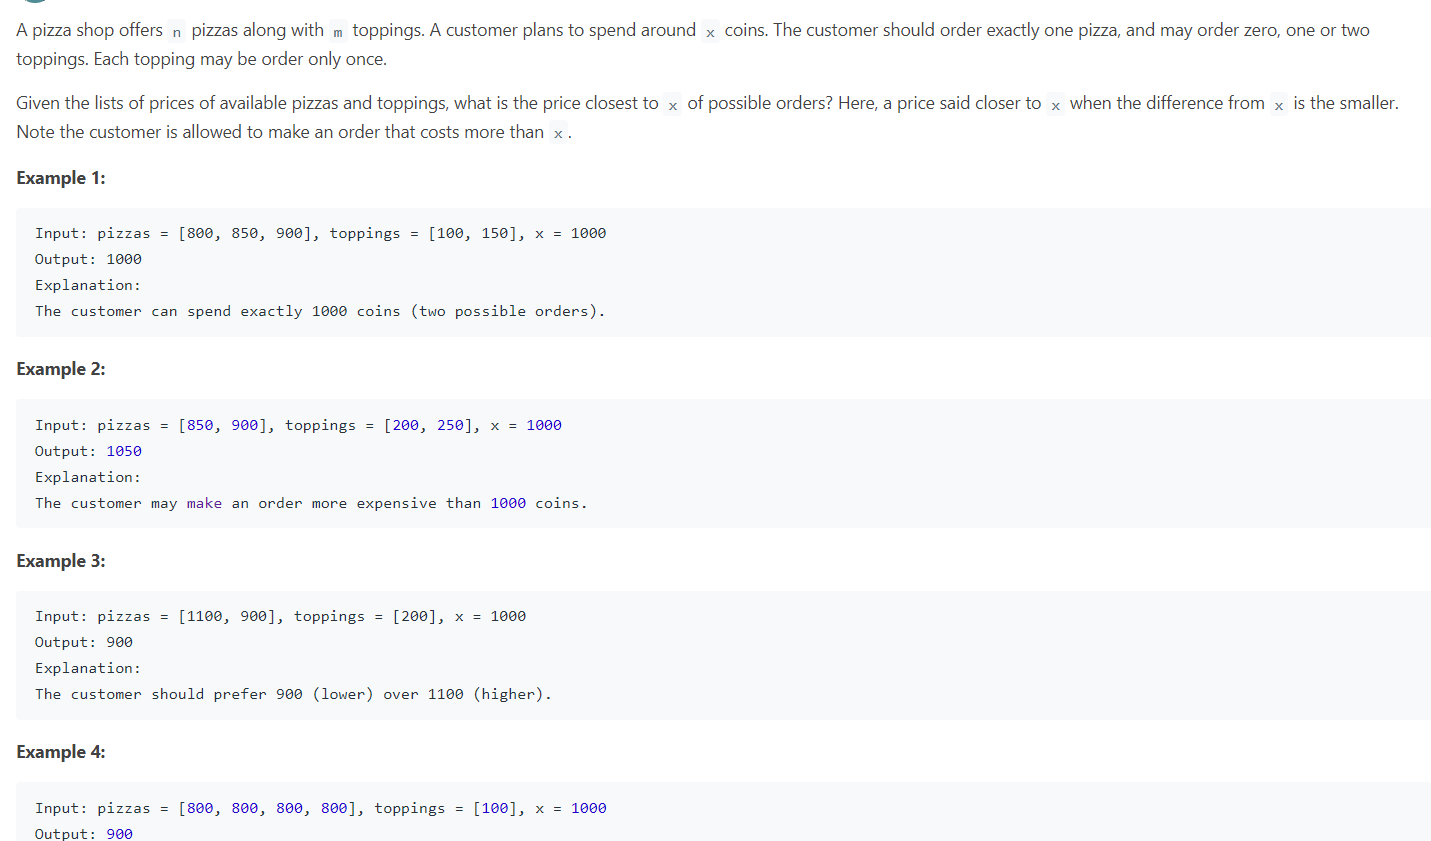

```cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <cmath>

int closestPrice(std::vector<int>& pizzas, std::vector<int>& toppings, int x) {
    std::vector<int> new_toppings = {0};

    // Generate combinations for 0, 1, and 2 toppings
    for (int i = 0; i < toppings.size(); ++i) {
        new_toppings.push_back(toppings[i]);
        for (int j = i + 1; j < toppings.size(); ++j) {
            new_toppings.push_back(toppings[i] + toppings[j]);
        }
    }

    std::sort(new_toppings.begin(), new_toppings.end());
    int closest = std::numeric_limits<int>::max(); // Initialize closest to infinity

    for (const int& pizza : pizzas) {
        auto idx = std::lower_bound(new_toppings.begin(), new_toppings.end(), x - pizza) - new_toppings.begin();

        for (int j = idx - 1; j <= idx + 1; ++j) {
            if (j >= 0 && j < new_toppings.size()) {
                int total_price = pizza + new_toppings[j];
                int diff = std::abs(total_price - x);

                if (diff == std::abs(closest - x)) {
                    closest = std::min(closest, total_price); // Take the lower price when the difference is equal
                } else if (diff < std::abs(closest - x)) {
                    closest = total_price;
                }
            }
        }
    }

    return closest;
}

int main() {
    std::vector<int> pizzas = {800, 850, 900};
    std::vector<int> toppings = {100, 150};
    int x = 1000;

    int result = closestPrice(pizzas, toppings, x);
    std::cout << "Closest Price: " << result << std::endl;

    return 0;
}


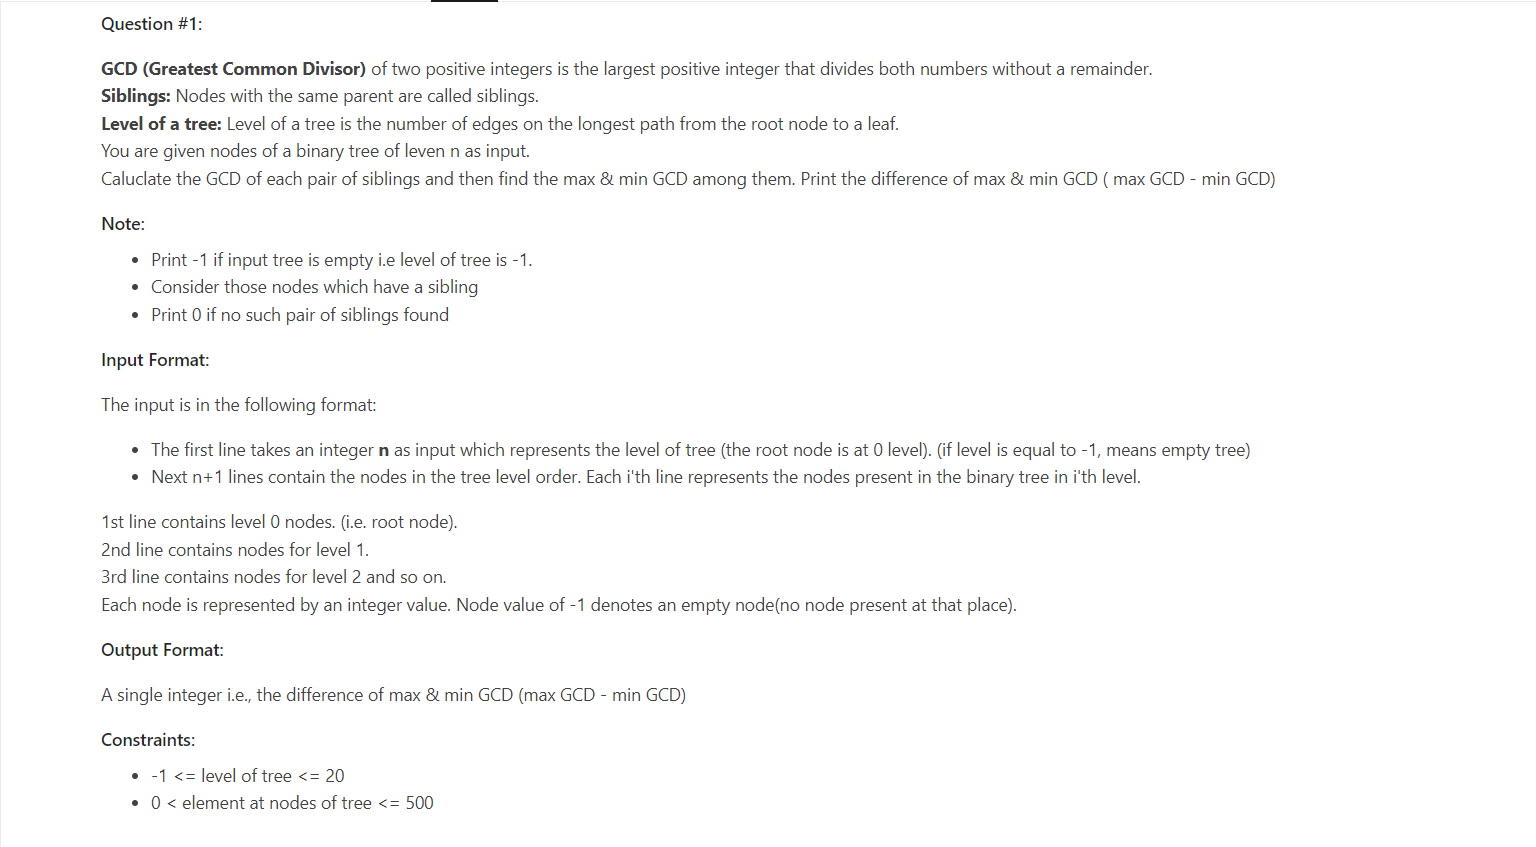

```cpp

#include <iostream>
#include <cmath>
#include <climits>

using namespace std;

int gcd(int a, int b) {
    if (b == 0) {
        return a;
    }
    return gcd(b, a % b);
}

int main() {
    int n;
    cin >> n;

    int minGCD = INT_MAX, maxGCD = INT_MIN;

    for (int i = 0; i <= n; i++) {
        if (i == 0) {
            int dummy;
            cin >> dummy;  // Skip the first input
        } else {
            for (int j = 0; j < pow(2, i); j += 2) {
                int a, b;
                cin >> a >> b;
                if (a == -1 || b == -1) {
                    continue;
                }
                int newGCD = gcd(a, b);
                if (newGCD < minGCD) {
                    minGCD = newGCD;
                }
                if (newGCD > maxGCD) {
                    maxGCD = newGCD;
                }
            }
        }
    }

    if (minGCD == INT_MAX && maxGCD == INT_MIN) {
        cout << 0;
        return 0;
    }
    cout << maxGCD - minGCD;

    return 0;
}


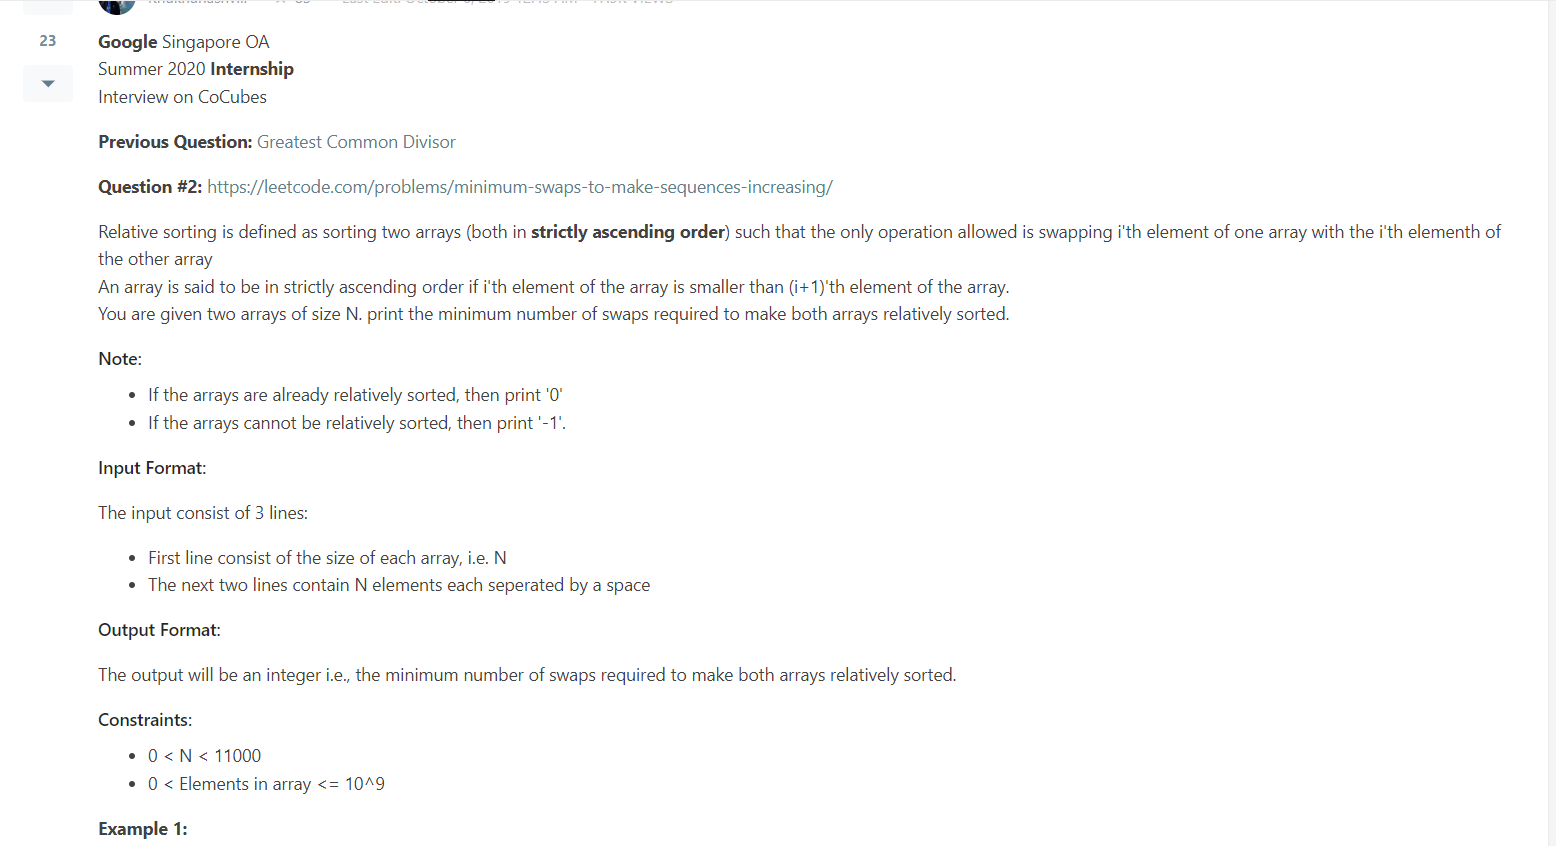

```cpp

class Solution {
public:
    int solve(vector<int>& nums1, vector<int>& nums2,int index, bool swapped,vector<vector<int>>&dp){
        if(index==nums1.size()) return 0;
        if(dp[index][swapped]!=-1) return dp[index][swapped];
        int ans=INT_MAX;
        int prev1=nums1[index-1];
        int prev2=nums2[index-1];
        
        if(swapped){
            swap(prev1,prev2);
        }
        
        if(nums1[index]>prev1 && nums2[index]>prev2)
            ans=min(ans,solve(nums1,nums2, index+1, 0,dp));
        if(nums1[index]> prev2 && nums2[index]>prev1)
            ans=min(ans,1+solve(nums1,nums2,index+1,1,dp));
        
        return dp[index][swapped]=ans;
    }
    int minSwap(vector<int>& nums1, vector<int>& nums2) {

        //it means that previous index were swapped or not 
            nums1.insert(nums1.begin(),-1);
            nums2.insert(nums2.begin(),-1);
            bool swapped=0;
            vector<vector<int>>dp(nums1.size()+1,vector<int>(2,-1));
            return solve(nums1, nums2,1,swapped,dp);
        
        }                                                         
};

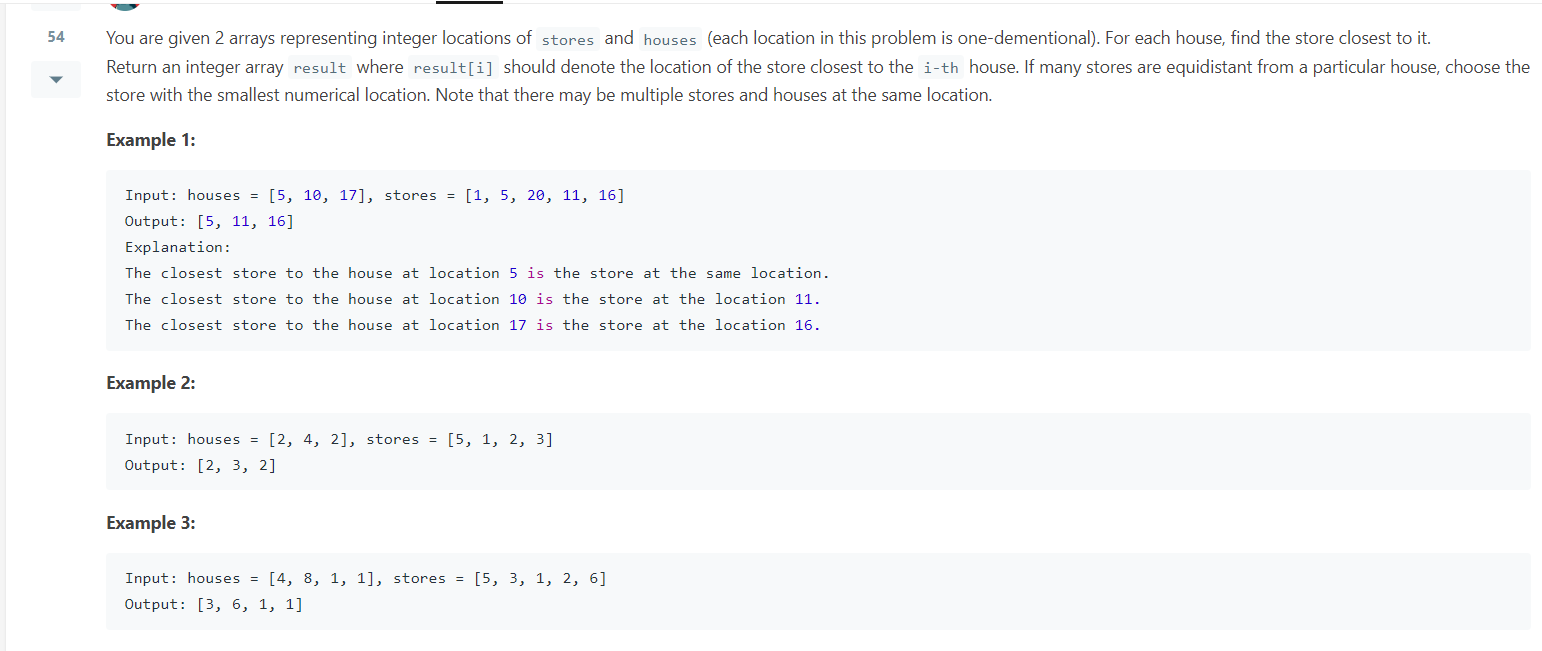

```cpp

class Solution {
public:
    vector<int> storesAndHouses(vector<int>&stores, vector<int>&houses) {
        sort(begin(stores), end(stores));
        vector<int> result;
        for (int house : houses) {
            int index = lower_bound(stores.begin(),stores.end(), house) - stores.begin();
            if (index == 0) result.emplace_back(stores[index]);
            else if (index == stores.size()) result.emplace_back(stores[index - 1]);
            else {
                int distanceLeft = house - stores[index - 1];
                int distanceRight = stores[index] - house;
                if (distanceLeft == distanceRight || distanceLeft < distanceRight) result.emplace_back(stores[index - 1]);
                else result.emplace_back(stores[index]);
            }
        }
        return result;
    }
};

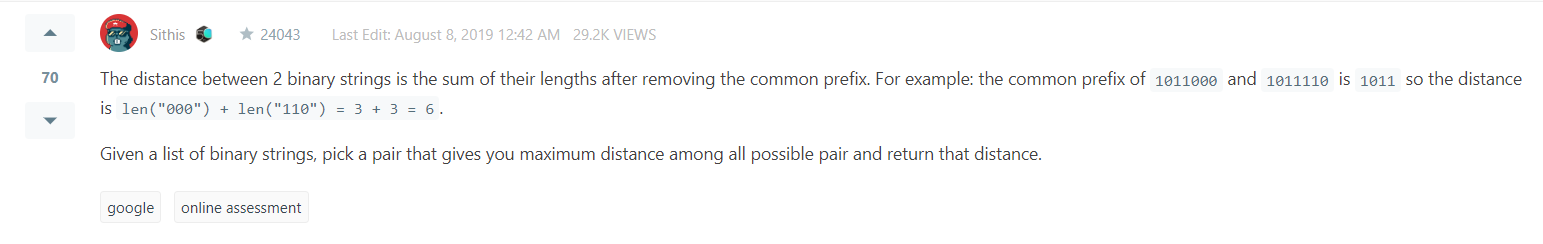

```cpp 
#include <iostream>
#include <vector>
#include <string>
#include <algorithm>
using namespace std;

class BinaryTrieNode {
private:
    char ch;

public:
    BinaryTrieNode* left;
    BinaryTrieNode* right;

    BinaryTrieNode(char c) {
        ch = c;
        left = nullptr;
        right = nullptr;
    }

    void set(char ch, BinaryTrieNode* node) {
        if (ch == '0') {
            left = node;
        } else if (ch == '1') {
            right = node;
        }
    }

    BinaryTrieNode* get(char ch) {
        if (ch == '0') {
            return left;
        } else if (ch == '1') {
            return right;
        }
        return nullptr;
    }
};

class BinaryTrie {
private:
    BinaryTrieNode* root;
    int maxDiff;

    int getMaxDepth(BinaryTrieNode* root) {
        if (root == nullptr)
            return 0;

        // Calculate left child depth
        int leftDepth = getMaxDepth(root->left);
        
        // Calculate right child depth
        int rightDepth = getMaxDepth(root->right);

        // Update maxDiff if both left and right depths are greater than 0
        if (leftDepth > 0 && rightDepth > 0) {
            maxDiff = max(maxDiff, leftDepth + rightDepth);
        }

        // Return max depth between left and right
        return 1 + max(leftDepth, rightDepth);
    }

public:
    BinaryTrie(const vector<string>& binaries) : maxDiff(0) {
        root = new BinaryTrieNode('\0');

        // Insert each binary string into Trie
        for (const string& str : binaries) {
            BinaryTrieNode* curr = root;

            for (char ch : str) {
                BinaryTrieNode* child = curr->get(ch);

                if (child == nullptr) {
                    child = new BinaryTrieNode(ch);
                    curr->set(ch, child);
                }

                curr = child;
            }
        }
    }

    int getMaxDiff() {
        getMaxDepth(root);
        return maxDiff;
    }
};

int main() {
    vector<string> binaries = {"1011100", "1011011", "1001111"};
    BinaryTrie trie(binaries);
    cout << trie.getMaxDiff() << endl;  // Expected output: 10

    binaries = {"1011000", "1011110"};
    BinaryTrie trie2(binaries);
    cout << trie2.getMaxDiff() << endl;  // Expected output: 6

    return 0;
}


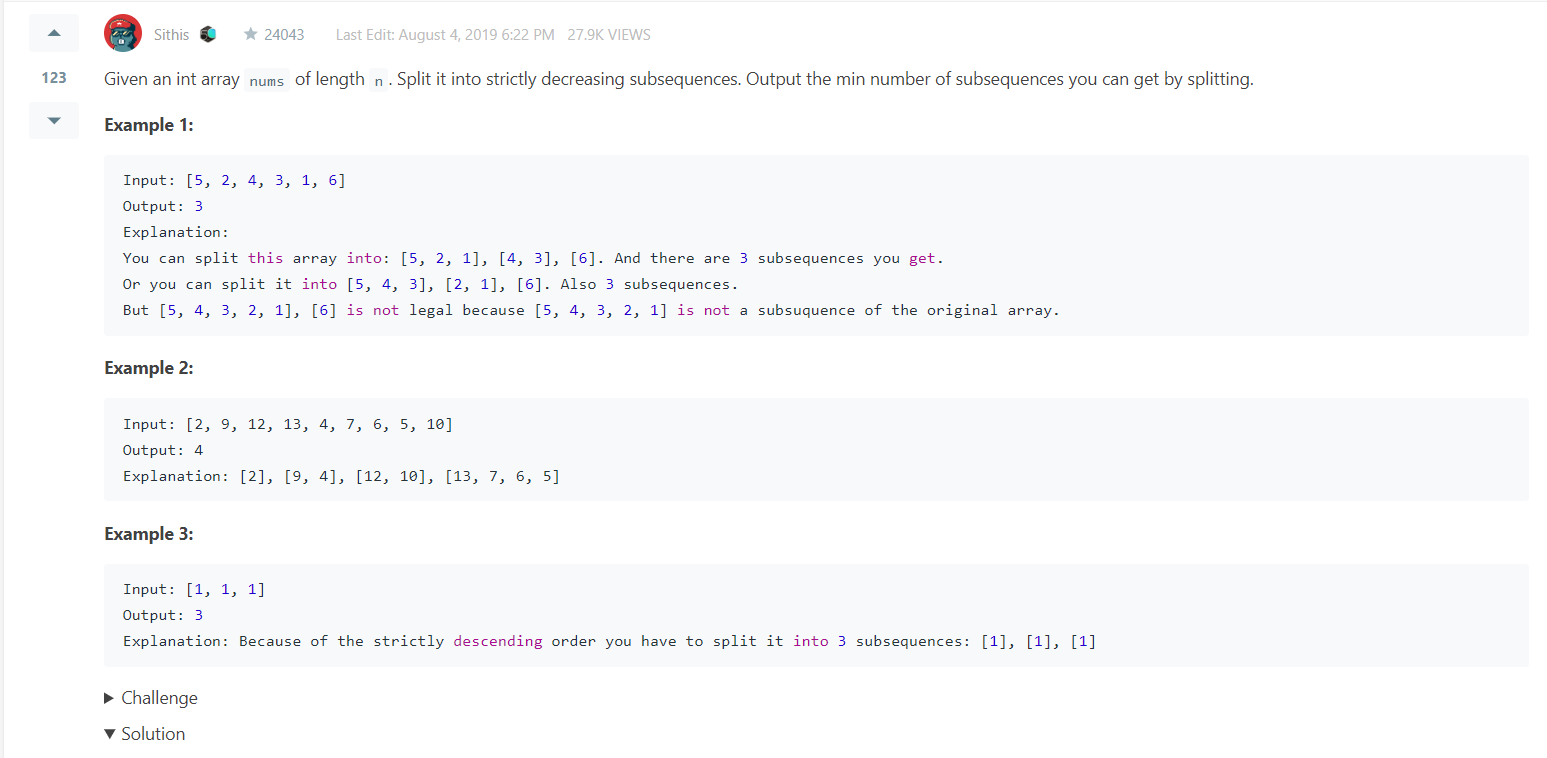

```cpp
class Solution {
public:
    int splitDecreasing(vector<int>&nums) {
        vector<int> container;
        for (int i = 0; i < nums.size(); ++i) {
            if (container.size() == 0) {
                container.push_back(nums[i]);
            } else {
                int index = upper_bound(container.begin(), container.end(), nums[i]) - container.begin();
                if (index == container.size()) {
                    container.push_back(nums[i]);
                } else {
                    container[index] = nums[i];
                }
            }
        }
        return container.size();
    }
};

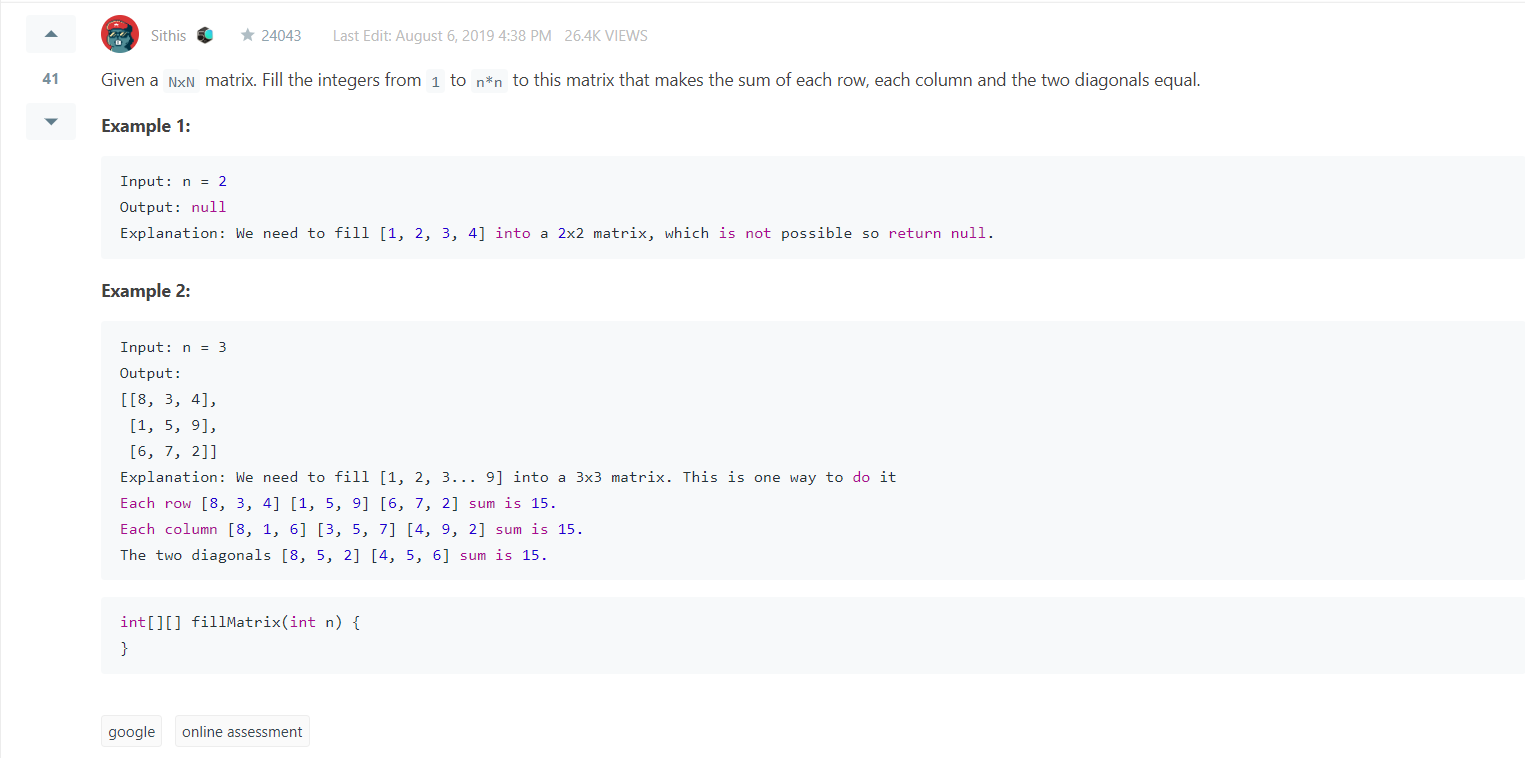

```cpp
#include <iostream>
#include <vector>
using namespace std;

class Solution {
public:
    vector<vector<int>> fill2DArray(int n) {
        if (n == 0 || n == 2) return {};
        if (n % 2 == 1)
            return fillMatrixOdd(n);
        else if (n % 4 == 0)
            return fillMatrixDoublyEven(n);
        else
            return fillMatrixSinglyEven(n);
    }

    vector<vector<int>> fillMatrixOdd(int n) {
        vector<vector<int>> arr(n, vector<int>(n, 0));

        // Starting position for 1
        int i = n / 2;
        int j = n - 1;

        // Put all values in magic square
        for (int num = 1; num <= n * n; ) {
            if (i == -1 && j == n) {
                i = 0;
                j = n - 2;
            }
            else {
                if (j == n)
                    j = 0;
                if (i == -1)
                    i = n - 1;
            }

            if (arr[i][j] != 0) {
                i++;
                j -= 2;
                continue;
            }
            else {
                arr[i][j] = num++;
            }

            i--;
            j++;
        }

        return arr;
    }

    vector<vector<int>> fillMatrixDoublyEven(int n) {
        vector<vector<int>> arr(n, vector<int>(n, 0));
        int i, j;
        
        // Fill matrix from 1 to n^2
        for (i = 0; i < n; i++) {
            for (j = 0; j < n; j++) {
                arr[i][j] = n * i + j + 1;
            }
        }

        // Flip based on conditions
        for (i = 0; i < n; i++) {
            for (j = 0; j < n; j++) {
                if (((i % 4 == 0 || i % 4 == 3) && (j % 4 == 1 || j % 4 == 2)) ||
                    ((i % 4 == 1 || i % 4 == 2) && (j % 4 == 0 || j % 4 == 3))) {
                    arr[i][j] = n * n + 1 - arr[i][j];
                }
            }
        }

        return arr;
    }

    vector<vector<int>> fillMatrixSinglyEven(int n) {
        // n = 4 * k + 2
        int k = (n - 2) / 4;
        vector<vector<int>> arr(n, vector<int>(n, 0));

        // Create a quarter grid
        vector<vector<int>> quarter = fillMatrixOdd(n / 2);
        int add = n * n / 4;

        // Fill the four sub-squares A, B, C, D
        // A
        for (int i = 0; i < n / 2; i++) {
            for (int j = 0; j < n / 2; j++) {
                arr[i][j] = quarter[i][j];
            }
        }

        // B
        for (int i = n / 2; i < n; i++) {
            for (int j = n / 2; j < n; j++) {
                arr[i][j] = quarter[i - n / 2][j - n / 2] + add;
            }
        }

        // C
        for (int i = 0; i < n / 2; i++) {
            for (int j = n / 2; j < n; j++) {
                arr[i][j] = quarter[i][j - n / 2] + 2 * add;
            }
        }

        // D
        for (int i = n / 2; i < n; i++) {
            for (int j = 0; j < n / 2; j++) {
                arr[i][j] = quarter[i - n / 2][j] + 3 * add;
            }
        }

        // Exchange the leftmost k columns in sub-square A with the corresponding columns of sub-square D
        for (int i = 0; i < n / 2; i++) {
            for (int j = 0; j < k; j++) {
                swap(arr[i][j], arr[i + n / 2][j]);
            }
        }

        // Exchange the rightmost k - 1 columns in sub-square C with the corresponding columns of sub-square B
        for (int i = 0; i < n / 2; i++) {
            for (int j = n - 1; j > n - k; j--) {
                swap(arr[i][j], arr[i + n / 2][j]);
            }
        }

        // Exchange the middle cell of the leftmost column of sub-square A with the corresponding cell of sub-square D
        swap(arr[n / 4][0], arr[n - 1 - n / 4][0]);

        // Exchange the central cell in sub-square A with the corresponding cell of sub-square D
        swap(arr[n / 4][n / 4], arr[n - 1 - n / 4][n / 4]);

        return arr;
    }
};

int main() {
    Solution sol;
    
    // Test case 1
    int n = 5;
    vector<vector<int>> matrix1 = sol.fill2DArray(n);
    cout << "Matrix for n = " << n << ":\n";
    for (const auto& row : matrix1) {
        for (int num : row) {
            cout << num << " ";
        }
        cout << endl;
    }
    
    // Test case 2
    n = 6;
    vector<vector<int>> matrix2 = sol.fill2DArray(n);
    cout << "\nMatrix for n = " << n << ":\n";
    for (const auto& row : matrix2) {
        for (int num : row) {
            cout << num << " ";
        }
        cout << endl;
    }

    return 0;
}


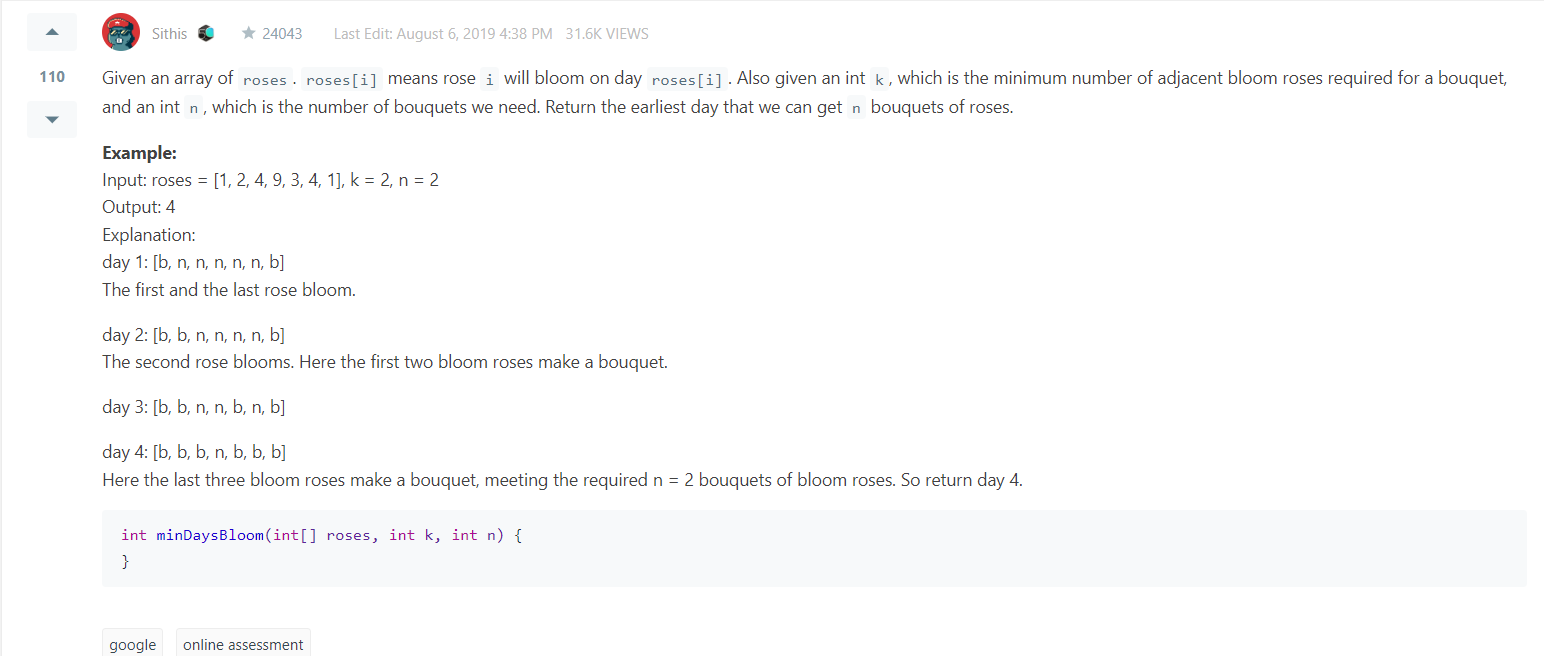

```cpp

#include <vector>
#include <algorithm>
#include <climits>

class Solution {
public:
    // Time Complexity: O(n * log(m)) where n -> size of roses array, m -> max day present in roses array
    // Space Complexity: O(1)
    int minDaysBloom(std::vector<int>& a, int k, int n) {
        if (a.empty() || n == 0 || k == 0) return 0;
        if (n * k > a.size()) return -1;

        int l = INT_MAX, r = INT_MIN;
        for (int val : a) {
            l = std::min(l, val);
            r = std::max(r, val);
        }

        while (l <= r) {
            int mid = l + (r - l) / 2;
            if (isValid(a, k, n, mid)) {
                r = mid - 1;
            } else {
                l = mid + 1;
            }
        }
        return l;
    }

    bool isValid(std::vector<int>& a, int size, int count, int day) {
        int curcount = 0, cursize = 0;
        for (int val : a) {
            if (val <= day) {
                cursize++;
            } else {
                cursize = 0;
            }

            if (cursize == size) {
                cursize = 0;
                curcount++;
            }

            if (curcount == count) return true;
        }
        return false;
    }
};


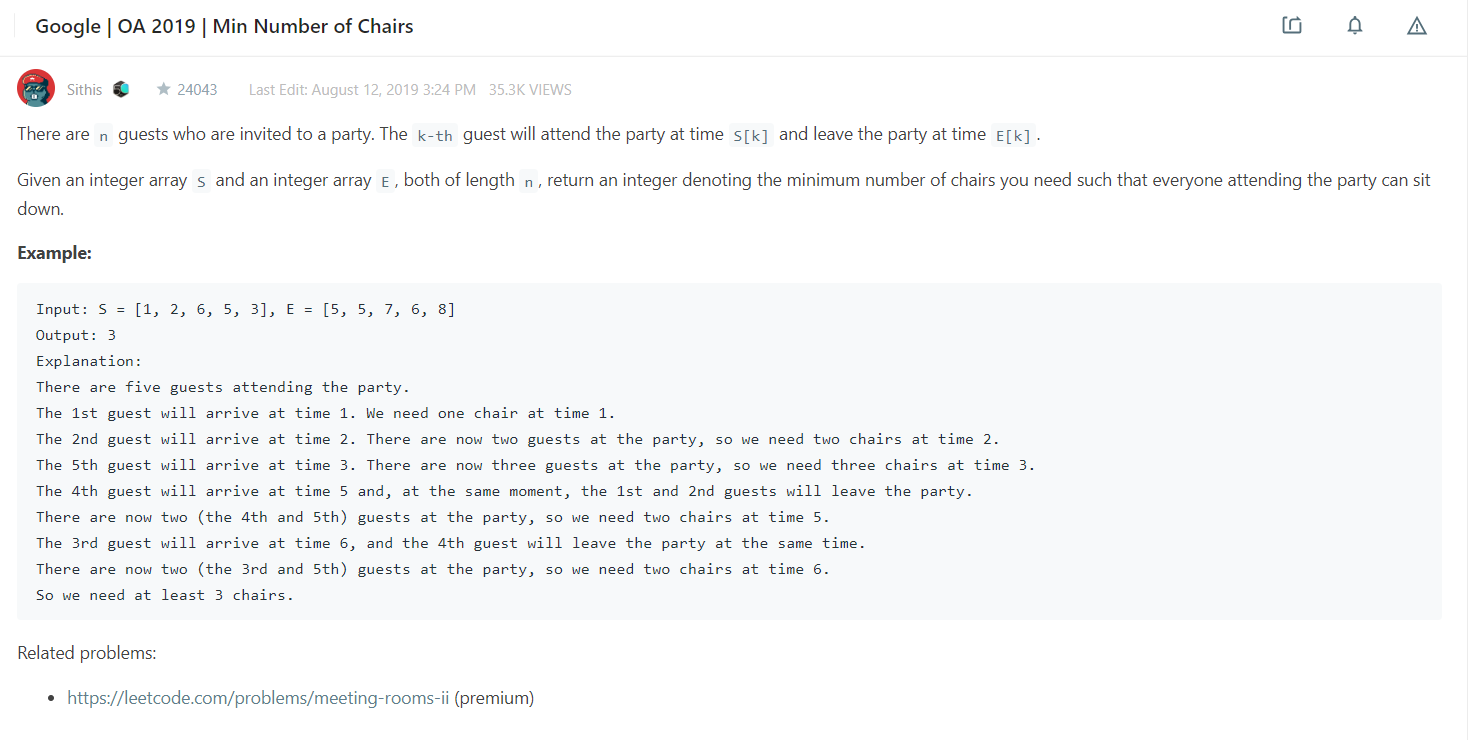

```cpp
class Solution {
public:
    int minChairs(vector<int>&S, vector<int>&E) {
        map<int, int> map1;
        int result = 0, count = 0;
        for (int i = 0; i < S.size(); ++i) {
            ++map1[S[i]];
            --map1[E[i]];
        }
        for (auto onePair : map1) {
            count += onePair.second;
            result = max(result, count);
        }
        return result;
    }   
}

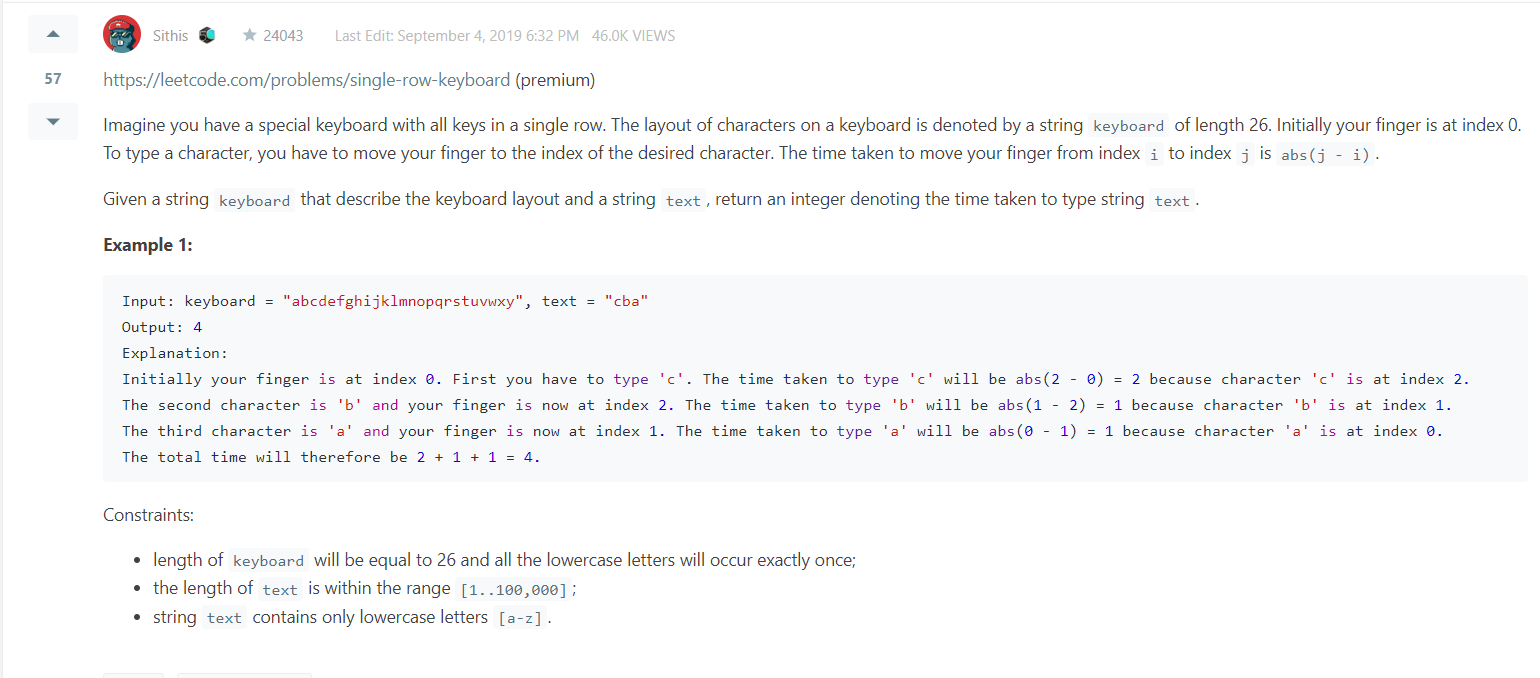

```cpp
#include <unordered_map>
#include <string>
#include <cmath> // for std::abs

class Solution {
public:
    int calculateTime(std::string keyboard, std::string word) {
        std::unordered_map<char, int> hashmap;
        
        // Build the hashmap from the keyboard
        for (int i = 0; i < keyboard.length(); ++i) {
            hashmap[keyboard[i]] = i;
        }
        
        int diff = hashmap[word[0]]; // Initialize with the position of the first character
        
        for (int i = 1; i < word.length(); ++i) {
            int n = hashmap[word[i]];
            int m = hashmap[word[i - 1]];
            // Output values for debugging
            std::cout << "n= " << n << " m= " << m << std::endl;
            diff += std::abs(n - m); // Calculate the absolute difference
        }
        
        return diff;
    }
};


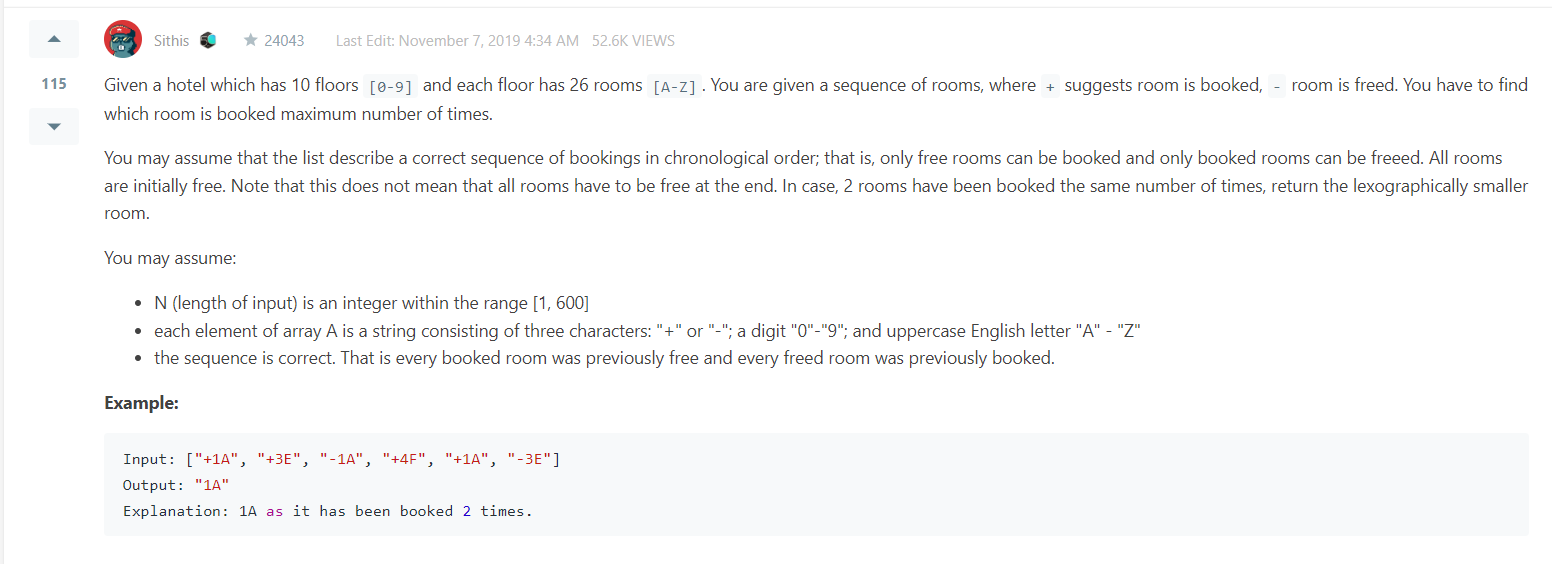

```cpp
#include <iostream>
#include <vector>
#include <map>
using namespace std;
string mostBookedRoom(vector<string> &vec){
    map<string,int> m;
    for(string s : vec){
        if(s[0] == '+'){m[s]++;}
    }
    string temp;
    int max = -1;
    for(auto i : m){
        if(i.second > max){
            max = i.second;
            temp = i.first;
        }
    }
    return string(temp.begin() + 1, temp.end());
}
int main() {
    vector<string> vec = {"+1A", "+3E", "-1A", "+4F", "+1A", "-3E", "+3E", "-3E", "+3E"};
    cout << mostBookedRoom(vec) << endl;
    return 0;
}

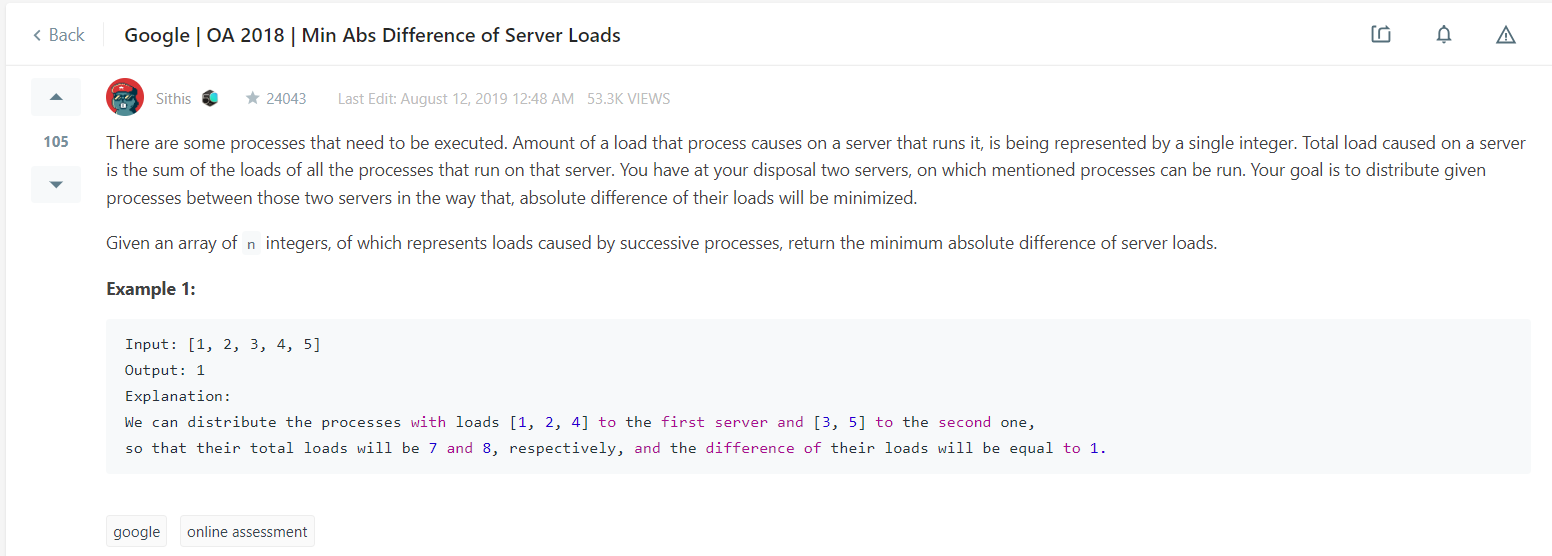

```cpp
class Solution {
public:
       bool f(int ind,int target,vector<int>&arr,vector<vector<int>>&dp){
        if(target==0)return true;
        if(ind==0){
            return arr[0]==target;
        }
        if(dp[ind][target]!=-1){
            return dp[ind][target];
        }
        bool notTake=f(ind-1,target,arr,dp);
        bool take=false;
        if(arr[ind]<=target){
            take=f(ind-1,target-arr[ind],arr,dp);
        }
        return dp[ind][target]=take|notTake;
        
        
    }
    
    bool canPartition(vector<int>& nums) {
        int sum=accumulate(nums.begin(),nums.end(),0);
        if (sum % 2 != 0) return false;
        int k = sum / 2;
        vector<vector<int>>dp(nums.size(),vector<int>(k+1,-1));
        
        return f(nums.size()-1,k,nums,dp);
        
    }
};

```cpp
#include <iostream>
#include <vector>
#include <climits> // For INT_MIN and INT_MAX
using namespace std;

int sol(int i, int j, int mx, int mn, vector<int> &a, vector<int> &b, vector<vector<int>> &dp) {
    if (i == a.size() && j == b.size()) {
        return 0;
    }
    
    if (dp[i][j] != -1) {
        return dp[i][j];
    }

    int res = 0;

    // Option 1: Take element from array `a`
    if (i < a.size()) {
        res = max(res, (max(mx, a[i]) - min(mn, a[i])) + sol(i + 1, j, max(mx, a[i]), min(mn, a[i]), a, b, dp));
    }

    // Option 2: Take element from array `b`
    if (j < b.size()) {
        res = max(res, (max(mx, b[j]) - min(mn, b[j])) + sol(i, j + 1, max(mx, b[j]), min(mn, b[j]), a, b, dp));
    }

    return dp[i][j] = res;
}

void solve() {
    int n;
    cin >> n;
    vector<int> a(n);
    for (int i = 0; i < n; ++i) {
        cin >> a[i];
    }

    int m;
    cin >> m;
    vector<int> b(m);
    for (int i = 0; i < m; ++i) {
        cin >> b[i];
    }

    vector<vector<int>> dp(n + 1, vector<int>(m + 1, -1));

    // Call the `sol` function starting from index 0 for both arrays
    cout << sol(0, 0, INT_MIN, INT_MAX, a, b, dp) << endl;
}

int main() {
    solve();
    return 0;
}
